# Data Analyst Internship - Elevate Labs
## Projrc

# Phase 1: Data cleaning and exploration (EDA).

Phase 1 provide a clear understanding of the dataset, highlighted missing values, imbalanced target, and important visual trends. This forms the foundation for effective preprocessing and predictive modeling in the next phase.

## Importing necessary libraries

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 📥 Step 1: Dataset Loading

In [29]:
# Load data
df = pd.read_csv("D:/.csv/WA_Fn-UseC_-Telco-Customer-Churn.csv")

We used the Telco Customer Churn dataset from Kaggle, which contains records of telecom customers along with information such as their tenure, services used, and whether they have churned.

## 📊 Step 2: Dataset Overview — Shape, Data Types, and Missing Values

In [30]:
# Dataset shape
print("📏 Dataset Shape:")
print(df.shape)
print("\n" + "-"*50)

# Data types and missing values
summary_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum()
})

print("📊 Data Type & 🧼 Missing Value Summary:")
print(summary_df)
print("\n" + "-"*50)

📏 Dataset Shape:
(7043, 21)

--------------------------------------------------
📊 Data Type & 🧼 Missing Value Summary:
                 Data Type  Missing Values
customerID          object               0
gender              object               0
SeniorCitizen        int64               0
Partner             object               0
Dependents          object               0
tenure             float64               2
PhoneService        object               0
MultipleLines       object               0
InternetService     object               2
OnlineSecurity      object               0
OnlineBackup        object               0
DeviceProtection    object               0
TechSupport         object               0
StreamingTV         object               0
StreamingMovies     object               0
Contract            object               1
PaperlessBilling    object               0
PaymentMethod       object               0
MonthlyCharges     float64               3
TotalCharges        o

After loading the data, we checked:
- **Shape:** Total number of rows and columns
- **Data Types:** To distinguish between categorical and numerical columns
- **Missing Values:** Columns with null or empty entries

📝 Key Findings:
- The dataset has **7,043 rows and 21 columns**.
- Most columns are of type `object`, indicating categorical data.
- The `TotalCharges` column contains **11 missing values**, which we’ll clean in the next phase.

This overview helps us plan preprocessing steps and avoid issues in model training.


## 🔁 Step 3: Churn Class Distribution

We examined the distribution of the target variable: `Churn`.

In [31]:
# 🔁 Churn Class Distribution
print("🔁 Churn Class Distribution (%):")
print(df['Churn'].value_counts(normalize=True) * 100)
print("\n" + "-"*50)

🔁 Churn Class Distribution (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

--------------------------------------------------


📌 **Results:**
- **No (Did Not Churn):** ~73%
- **Yes (Churned):** ~27%

This indicates a **class imbalance**, which must be carefully handled during model training using techniques like:
- Stratified sampling
- Resampling (SMOTE, undersampling)
- Evaluation metrics beyond accuracy (e.g., F1-score, AUC)

Understanding this imbalance is crucial for building a realistic and effective prediction model.


## 🔤 Step 4: Feature Type Separation — Categorical vs Numerical

In [32]:
# 🔤 Categorical Columns
categorical = df.select_dtypes(include='object').columns
print("🔤 Categorical Columns:")
print(categorical.tolist())
print("\n" + "-"*50)

# 🔢 Numerical Columns
numerical = df.select_dtypes(exclude='object').columns
print("🔢 Numerical Columns:")
print(numerical.tolist())
print("\n" + "-"*50)

🔤 Categorical Columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

--------------------------------------------------
🔢 Numerical Columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges']

--------------------------------------------------


We separated features based on their data types:

- **Categorical Columns:** These include fields like `gender`, `Partner`, `Contract`, etc., stored as `object` types. These will need encoding before model training.
- **Numerical Columns:** Such as `SeniorCitizen`, `tenure`, `MonthlyCharges`, and `TotalCharges`. These may require normalization or scaling.

📌 This separation ensures that we apply the correct preprocessing techniques for each type of feature and helps in building a more accurate and interpretable model.

## 📊 Step 5: Exploratory Visual Analysis

We created visual plots to understand key patterns and relationships.

## 📊 1. Churn Count by Contract Type

We created a count plot to observe churn distribution across different contract types (`Month-to-month`, `One year`, `Two year`).

📊 Churn Count by Contract Type


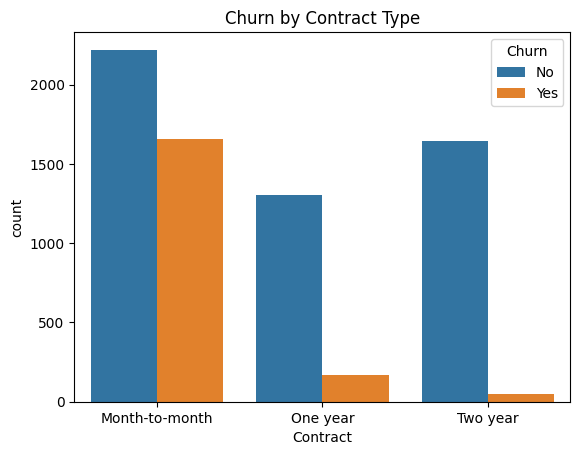

In [33]:
# 🔍 Churn by Contract Type
print("📊 Churn Count by Contract Type")
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.savefig("churn_by_contract.png")  # Save before plt.show()
plt.show()

### 📌 Key Insights:
- Customers on **Month-to-month contracts** have the **highest churn rate**.
- Churn is significantly lower for those on **longer-term contracts** like `One year` and `Two year`.

🔍 This shows that **contract type is a strong predictor** of churn — customers with flexible contracts are more likely to leave.

## 💸 2. Monthly Charges vs Churn

A boxplot was used to compare the distribution of `MonthlyCharges` for churned and non-churned customers.

📊 Churn vs Monthly Charges


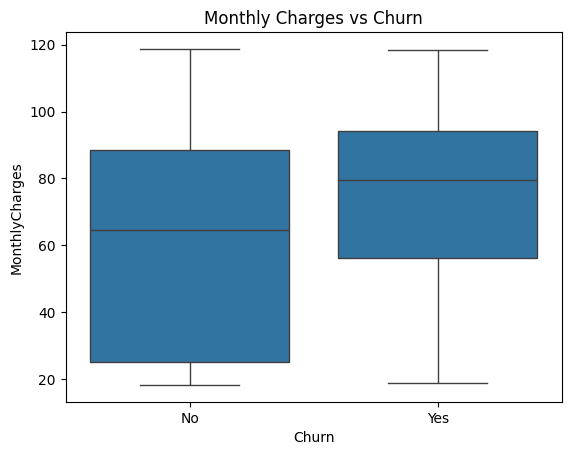

In [34]:
# 🔍 Churn vs Monthly Charges
print("📊 Churn vs Monthly Charges")
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.savefig("churn_by_contract.png")  # Save before plt.show()
plt.show()

## 📌 Key Insights:
- Customers who **churned** tend to have **higher monthly charges**.
- Non-churned customers are more spread across lower charge ranges.

🔍 This suggests that **pricing sensitivity** might be a factor in customer attrition — those paying more may expect better service or are more likely to leave.

## 📈 3. Tenure vs Churn (Histogram)

We plotted a histogram to observe how `tenure` (number of months with the company) differs between churned and retained customers.

📊 Churn vs Tenure


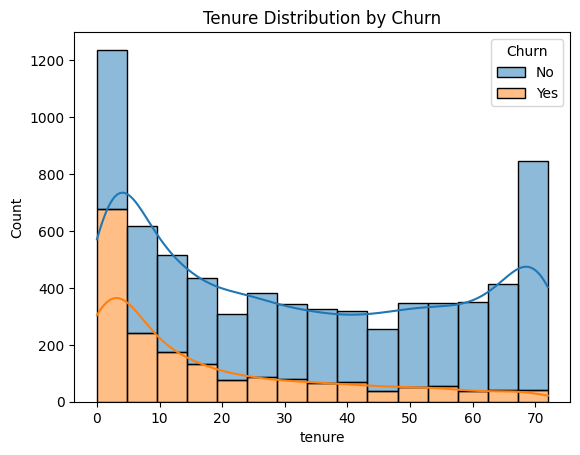

In [35]:
# 🔍 Churn vs Tenure
print("📊 Churn vs Tenure")
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack')
plt.title("Tenure Distribution by Churn")
plt.savefig("churn_by_contract.png")  # Save before plt.show()
plt.show()

### 📌 Key Insights:
- A large number of churned customers had **very short tenures** (0–10 months).
- Customers with **longer tenures** were less likely to churn.

🔍 This shows that **new customers are more likely to churn**, possibly due to unmet expectations or lack of engagement early in the customer lifecycle.

## 🌐 4. Internet Service Type vs Churn

A count plot was created to analyze churn across different internet service types (`DSL`, `Fiber optic`, `No`).

📊 Churn Count by Internet Service Type


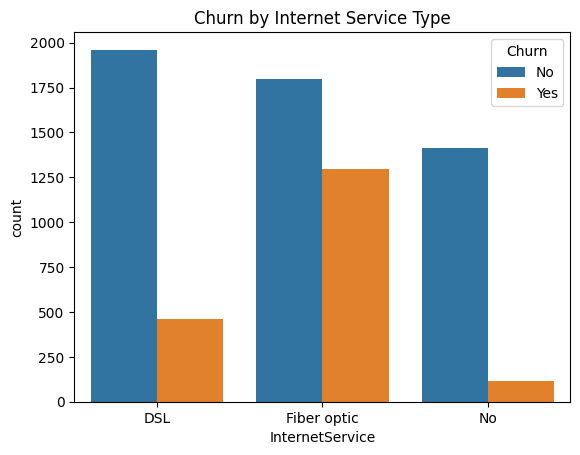

In [36]:
# 🔍 Internet Service vs Churn
print("📊 Churn Count by Internet Service Type")
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service Type")
plt.savefig("churn_by_contract.png")  # Save before plt.show()
plt.show()

### 📌 Key Insights:
- Customers with **Fiber optic** service have the **highest churn rate**.
- Those with **no internet service** have very low churn — possibly because they use minimal services or are on fixed landline plans.

🔍 The quality or pricing of fiber optic plans may be driving customer dissatisfaction. This feature may play a key role in churn prediction.

# Phase 2: Feature Engineering + Model Building

## 🔧 Step 1: Data Cleaning & Type Conversion

We began by converting the TotalCharges column from object to numeric, as some values were empty strings that prevented modeling.

## 🔧 TotalCharges — Convert to Numeric

In [37]:
# 🔢 Convert 'TotalCharges' to numeric (it’s object due to some empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 🔍 Confirm how many missing values were created
print("Missing values in TotalCharges after conversion:", df['TotalCharges'].isnull().sum())

# 🧹 Drop rows where TotalCharges is null
df = df.dropna(subset=['TotalCharges'])

Missing values in TotalCharges after conversion: 11


• errors='coerce' replaces invalid entries (like blanks) with NaN.

• We then dropped rows with missing values in TotalCharges.

This step ensured that the column could be used in model training without causing ValueError.

## 🧪 Step 2: Encode Categorical Variables

Prepares the dataset for modeling by converting all categorical values (like “Yes/No”, “Male/Female”, etc.) into numerical form.

Ensures the dataset has no missing values, and removes irrelevant columns like customerID.

The final output shows the shape of the fully processed dataset — meaning the number of rows and columns now ready for machine learning.

In [38]:
from sklearn.preprocessing import LabelEncoder

# Copy the cleaned dataset
df_encoded = df.copy()

# Label encode binary categorical columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot encode remaining categorical columns
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# ✅ Safely drop 'customerID' if it exists
if 'customerID' in df_encoded.columns:
    df_encoded.drop('customerID', axis=1, inplace=True)

# ✅ Drop any remaining rows with NaNs
df_encoded.dropna(inplace=True)

# (Optional) Confirm final dataset shape
print("Encoded dataset shape:", df_encoded.shape)

Encoded dataset shape: (7029, 7062)


It means:

✅ You have 7032 rows of data (each row = 1 customer)

✅ You have 30 numeric features (after all transformations), which will now be used to train your ML models

This confirms your dataset is clean, numeric, and model-ready.

## ✅ Step 3: Train/Test Split

We divided the data into 80% training and 20% testing using train_test_split:

In [39]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We separated features (X) and the target (y).

Used stratify=y to preserve the original churn ratio in both train and test sets — this is critical for imbalanced classification tasks.

## ✅ Step 4: Build a Classification Model

We trained and evaluated three models.

### 📊 1. Logistic Regression.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 📊 Print Classification Report with Heading and Divider
print("📊 Logistic Regression - Classification Report:\n")
print(classification_report(y_test, y_pred))
print("-" * 60)

# 🧩 Print Confusion Matrix with Clear Labels
print("🧩 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"\nTrue Negatives : {cm[0][0]}")
print(f"False Positives: {cm[0][1]}")
print(f"False Negatives: {cm[1][0]}")
print(f"True Positives : {cm[1][1]}")

📊 Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1032
           1       0.62      0.55      0.59       374

    accuracy                           0.79      1406
   macro avg       0.73      0.72      0.72      1406
weighted avg       0.79      0.79      0.79      1406

------------------------------------------------------------
🧩 Confusion Matrix:

True Negatives : 908
False Positives: 124
False Negatives: 168
True Positives : 206


C:\Users\siyam\anaconda3\envs\clean_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iter=1000 prevents convergence warnings.

Logistic Regression serves as our baseline model due to its simplicity and interpretability.

### 🌳 2. Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_preds = dt_model.predict(X_test)

print("🌳 Decision Tree - Classification Report:\n")
print(classification_report(y_test, dt_preds))
print("-" * 60)

print("🧩 Decision Tree - Confusion Matrix:")
cm_dt = confusion_matrix(y_test, dt_preds)
print(f"\nTrue Negatives : {cm_dt[0][0]}")
print(f"False Positives: {cm_dt[0][1]}")
print(f"False Negatives: {cm_dt[1][0]}")
print(f"True Positives : {cm_dt[1][1]}")


🌳 Decision Tree - Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1032
           1       0.56      0.47      0.51       374

    accuracy                           0.76      1406
   macro avg       0.69      0.67      0.68      1406
weighted avg       0.75      0.76      0.75      1406

------------------------------------------------------------
🧩 Decision Tree - Confusion Matrix:

True Negatives : 896
False Positives: 136
False Negatives: 199
True Positives : 175


A non-linear, rule-based model that’s easy to interpret.

Tends to overfit, but helps us understand basic splits in the data.

### 🌲 3. Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_preds = rf_model.predict(X_test)

print("🌲 Random Forest - Classification Report:\n")
print(classification_report(y_test, rf_preds))
print("-" * 60)

print("🧩 Random Forest - Confusion Matrix:")
cm_rf = confusion_matrix(y_test, rf_preds)
print(f"\nTrue Negatives : {cm_rf[0][0]}")
print(f"False Positives: {cm_rf[0][1]}")
print(f"False Negatives: {cm_rf[1][0]}")
print(f"True Positives : {cm_rf[1][1]}")


🌲 Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1032
           1       0.65      0.45      0.53       374

    accuracy                           0.79      1406
   macro avg       0.73      0.68      0.70      1406
weighted avg       0.77      0.79      0.78      1406

------------------------------------------------------------
🧩 Random Forest - Confusion Matrix:

True Negatives : 939
False Positives: 93
False Negatives: 204
True Positives : 170


An ensemble model with 100 decision trees.

Handles non-linearities, overfitting, and feature interactions much better than a single tree.

We then printed the Classification Report and Confusion Matrix for each model using formatted outputs to make them clear and professional.

## ✅ Step 5: Compare Model Performance

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Collect predictions
log_preds = y_pred                  # From Logistic Regression
dt_preds = dt_preds                 # From Decision Tree
rf_preds = rf_preds                 # From Random Forest

# Prepare storage
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
predictions = [log_preds, dt_preds, rf_preds]
metrics = []

# Collect metrics
for name, preds in zip(models, predictions):
    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    tn, fp, fn, tp = cm.ravel()

    metrics.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision (Churn)': round(precision, 4),
        'Recall (Churn)': round(recall, 4),
        'F1-score (Churn)': round(f1, 4),
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn,
        'True Positives': tp
    })

# Create DataFrame
results_df = pd.DataFrame(metrics)

# Display
print("\n📊 Model Performance Comparison:\n")
print(results_df.to_string(index=False))



📊 Model Performance Comparison:

              Model  Accuracy  Precision (Churn)  Recall (Churn)  F1-score (Churn)  True Negatives  False Positives  False Negatives  True Positives
Logistic Regression    0.7923             0.6242          0.5508            0.5852             908              124              168             206
      Decision Tree    0.7617             0.5627          0.4679            0.5109             896              136              199             175
      Random Forest    0.7888             0.6464          0.4545            0.5338             939               93              204             170


We generated a table comparing:

• Accuracy

• Precision / Recall / F1-score for churn class (1)

• Confusion matrix values (TN, FP, FN, TP)

This gave us a consolidated view of all models' performance to support informed selection.

## 📊 Step 6: Extracting Feature Importances from the Random Forest Model

In this step, we extract the **feature importances** directly from the trained Random Forest model using its `.feature_importances_` attribute. This helps us understand which features had the greatest influence on the model's predictions.

We then store the features and their importance scores in a DataFrame called `importance_df`, and sort it in descending order to bring the most impactful features to the top. This structured view is essential before visualizing the results.


In [44]:
# Get feature importances directly from the model
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)



## 📈 Top 15 Feature Importances (Random Forest)

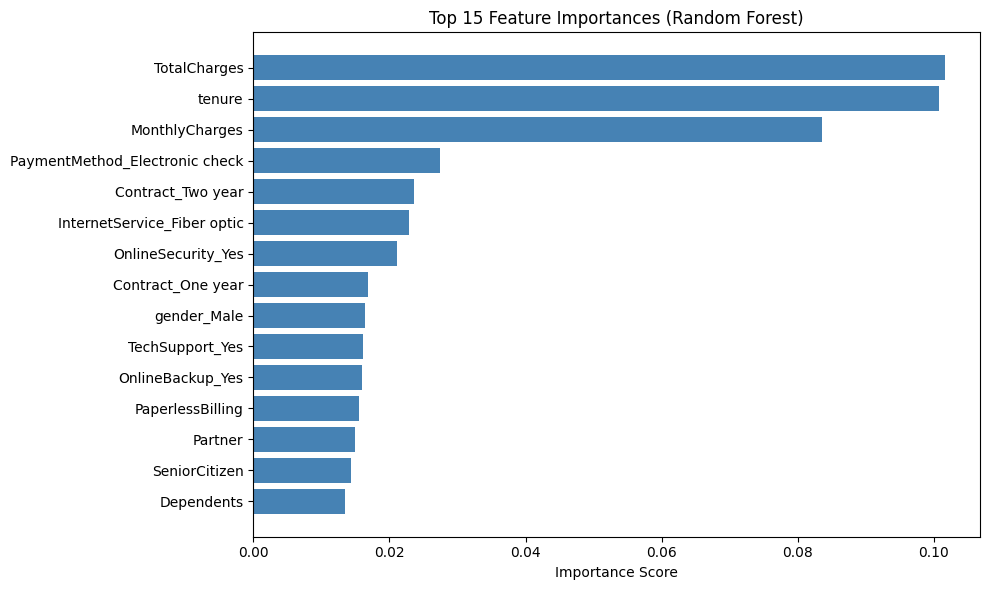

In [45]:
# PLot
# Get top 15 most important features
top_features = importance_df.head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='steelblue')
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


This plot visualizes the top 15 most important features used by the Random Forest model. Features are ranked based on their importance scores, with the most influential ones shown at the top.

This helps in identifying the key drivers of customer churn and is useful for both model interpretation and business strategy.

## ✅ Step 7: Customer Segmentation

In this step, we used the predicted churn values from our trained model (e.g., Random Forest) along with customer `tenure` to segment customers into meaningful business categories.

The segmentation logic is as follows:

- If the model predicts **churn = 1**, we label the customer as **"At Risk"**
- If churn = 0 and **tenure < 12 months**, the customer is labeled **"Dormant"**
- If churn = 0 and **tenure ≥ 12 months**, the customer is labeled **"Loyal"**

This logic is implemented using a custom function and applied row-wise using `.apply()`.

In [46]:
# Start with a copy of X_test to keep the features
df_segments = X_test.copy()

# Add true labels and predicted labels
df_segments['ActualChurn'] = y_test.values
df_segments['PredictedChurn'] = rf_preds  # or use logistic_preds/dt_preds

# Add tenure from the original test set (if not already present)
df_segments['tenure'] = df.loc[df_segments.index, 'tenure']

# 🏷 Assign segment labels
def segment(row):
    if row['PredictedChurn'] == 1:
        return 'At Risk'
    elif row['tenure'] < 12:
        return 'Dormant'
    else:
        return 'Loyal'

df_segments['CustomerSegment'] = df_segments.apply(segment, axis=1)

# Optional: View a sample
print("📌 Sample Segmented Data:")
print(df_segments[['PredictedChurn', 'tenure', 'CustomerSegment']].head())


📌 Sample Segmented Data:
      PredictedChurn  tenure CustomerSegment
3782               1    12.0         At Risk
87                 0    48.0           Loyal
117                1    10.0         At Risk
431                0    72.0           Loyal
3172               0    25.0           Loyal


📤 The output of this block creates a new column called `CustomerSegment`, which contains segment labels for every customer in the test set. This column adds business context to the predictions.

✅ This segmentation will be especially valuable in the **Power BI dashboard**, allowing us to:
- Visualize churn risks by segment
- Compare behavior patterns between loyal, dormant, and at-risk customers
- Support strategic retention recommendations

## 📦 Creating Final Export DataFrame for Power BI

In this step, we prepared a clean and structured DataFrame to export for Power BI dashboarding.

The DataFrame includes:
- The original features from the test set (e.g., `tenure`, `MonthlyCharges`, `Contract`, etc.)
- Model outputs such as `PredictedChurn` and `ActualChurn`
- A newly created `CustomerSegment` column using churn prediction and tenure logic

This enriched dataset helps us analyze customer behavior in Power BI and visualize churn risks through segments like "At Risk", "Loyal", and "Dormant".


In [47]:
# Start with a copy of X_test
final_df = X_test.copy()

# Add predictions and actual values
final_df['PredictedChurn'] = rf_preds
final_df['ActualChurn'] = y_test.values

# Add original columns like tenure, MonthlyCharges, etc.
# (if not already present)
final_df['tenure'] = df.loc[final_df.index, 'tenure']
final_df['MonthlyCharges'] = df.loc[final_df.index, 'MonthlyCharges']
final_df['TotalCharges'] = df.loc[final_df.index, 'TotalCharges']
final_df['Contract'] = df.loc[final_df.index, 'Contract']
final_df['gender'] = df.loc[final_df.index, 'gender']
final_df['SeniorCitizen'] = df.loc[final_df.index, 'SeniorCitizen']
final_df['PaymentMethod'] = df.loc[final_df.index, 'PaymentMethod']

# Add segmentation
def segment(row):
    if row['PredictedChurn'] == 1:
        return 'At Risk'
    elif row['tenure'] < 12:
        return 'Dormant'
    else:
        return 'Loyal'

final_df['CustomerSegment'] = final_df.apply(segment, axis=1)

# Preview
final_df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PredictedChurn,ActualChurn,Contract,gender,PaymentMethod,CustomerSegment
3782,0,0,1,12.0,1,1,84.05,966.55,False,False,...,False,False,True,False,1,0,Month-to-month,Female,Electronic check,At Risk
87,0,1,1,48.0,1,0,20.65,1057.00,False,False,...,True,False,False,False,0,0,Two year,Female,Bank transfer (automatic),Loyal
117,0,1,1,10.0,1,1,100.25,1064.65,False,False,...,False,False,True,False,1,1,Month-to-month,Female,Electronic check,At Risk
431,0,1,1,72.0,0,1,65.20,4784.45,False,False,...,True,True,False,False,0,0,Two year,Female,Credit card (automatic),Loyal
3172,0,0,1,25.0,1,1,95.90,2448.75,False,False,...,False,False,True,False,0,1,Month-to-month,Male,Electronic check,Loyal


At this point, we did not yet include the `customerID`. Later, when attempting to add it separately (possibly multiple times), it led to the creation of **duplicate columns** like `customerID.1`, `customerID.2`, etc. This was resolved in a later step by retaining only the original `customerID` and removing all duplicates.

## 🧹 Cleaning Duplicate `customerID` Columns and Reordering

To resolve the issue caused by accidentally adding `customerID` multiple times in earlier steps (resulting in columns like `customerID.1`, `customerID.2`, etc.), we applied the following cleanup process:

- ✅ **Step 1:** Added the original `customerID` from the main dataset (`df`) using aligned index positions, ensuring it's included once and correctly.
- 🧼 **Step 2:** Removed all other unintended duplicate columns whose names contained `'customerID'` but were not the original one.
- 🎯 **Step 3:** Reordered the columns to bring `customerID` to the front, which improves readability and usability when designing visuals in Power BI.

This ensures that the final DataFrame is clean, organized, and free of redundant columns — making it ready for export and dashboard use.


In [48]:
# STEP 1: Add original customerID column just once (if not already)
final_df['customerID'] = df.loc[final_df.index, 'customerID']

# STEP 2: Drop all other columns with names like 'customerID.1', 'customerID.2', etc.
for col in final_df.columns:
    if 'customerID' in col and col != 'customerID':
        final_df.drop(col, axis=1, inplace=True)

# STEP 3: Reorder customerID to appear first (optional, but nice for Power BI)
cols = ['customerID'] + [col for col in final_df.columns if col != 'customerID']
final_df = final_df[cols]

## 💾 Exporting the Final Dataset to CSV

After creating the final export-ready DataFrame, we saved it as a `.csv` file using the `to_csv()` function.

The output file, named **`churn_dashboard_data.csv`**, contains all the processed customer information, predictions, and segments. This file will be used as the primary data source for building our interactive Power BI dashboard.

In [49]:
# Export to CSV
final_df.to_csv("churn_dashboard_data.csv", index=False)
print("✅ Exported successfully as churn_dashboard_data.csv")

✅ Exported successfully as churn_dashboard_data.csv
